# DMHR Assessment 

This document outlines the process of completing the asssessment as outlined in the link below 


https://moodle-1819.ucl.ac.uk/pluginfile.php/1233633/mod_resource/content/1/assignment2018_23_11_2018_word_CMC_HK_SD.pdf 

- This assignment will be completed using Python3:

- The following datasets where used for this assignment:
    1. NHS Digital GP Practice Prescribing (April/2018): 
        - Documentation:https://digital.nhs.uk/data-and-information/publications/statistical/practice-level-prescribing-data/april-2018 
        
   - https://files.digital.nhs.uk/38/03EC1C/T201804PDPI%20BNFT.CSV 
  -  https://files.digital.nhs.uk/79/6D58A8/T201804CHEM%20SUBS.CSV 
    
    2. NHS Digital GP Practice Demographics (April/2018): 
       - Documentation: https://files.digital.nhs.uk/80/B0746E/gp-reg-pat-prac-met-guid-apr-18.pdf
        
    https://files.digital.nhs.uk/71/B59D99/gp-reg-pat-prac-all.csv
    
    3. WHO Mortality (ICD-10 version) and Population datasets: 
        - Documentation:  https://www.who.int/healthinfo/statistics/documentation.zip?ua=1  
    
      https://www.who.int/healthinfo/statistics/Morticd10_part1.zip?ua=1 
   - https://www.who.int/healthinfo/statistics/Morticd10_part2.zip?ua=1
   - https://www.who.int/healthinfo/statistics/country_codes.zip?ua=1 
   - https://www.who.int/healthinfo/Pop.zip?ua=1
   
   
- GithubURl : https://github.com/bujo2020/DMHR-Assignment/blob/master/DMHR%20Assessment%20.ipynb

- Before addressing the questions, we will import the libraries which wil be used for this assignment

In [1230]:
#Import pandas library which will hold the csv files
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandasql
from pandasql import sqldf
from math import floor
import scipy
import warnings
warnings.filterwarnings('ignore')

Download the files needed to answer the question

#Method 1 
- Import directly from the weblink
  -  ***Please note that this method might be very slow

url="https://addyoururllinkforthefilesaboce"
c=pd.read_csv(url)

#Method 2 
1. Download the file to system
    - #Identify the file location for saved downloaded documents 

In [1209]:
#Move to the file location of download 
# **This will be different for each device

## Assignment A

- The NHS has been challenged to make “efficiency savings” and you have been commissioned by an NHS executive to review, document and assess GP prescribing costs. Using data from the GP Practice Prescribing dataset (April 2018) address the following queries using a combination of narrative, tables, figures, and descriptive statistics:

### Import and Explore the data

Import the files which contain the data found in the zip
GP_Practice_Level_Prescribing_level Data_April 2018.CSV 


In [1212]:
#Import the data 
#NHS Digital GP Practice Prescribing
GP_PRSC = pd.read_csv('GP_Practice_Level_Prescribing_level Data_April 2018.CSV')
#Practice Level Prescribing Presentation-level Data - April 2018: Practice codes, names and addresses
GP_DEMO = pd.read_csv('GP_Practice_Level_Prescribing_Presentation-level_Practice codes_names_and_addresses.CSV')
#Patients Registered at a GP Practice - April 2018: Totals (GP practice-all persons)
GP_Patients = pd.read_csv('GP_Reg_Patients-April_2018.csv')

In [1213]:
#explore the data first 5 rows
#Print the head of the df
GP_PRSC.head(10)
#The coloumn headings mean:
#SHA -strategic health authority
#PCT - Primary Care Trust
#Practice - Practice code names: The format is Axxxxx where "A" is a letter and "xxxxx" is a 5 digit number
# BNF Code - British National Formulary code 
# BNF Name - Drug Name 
#ITEMS - This gives the number of items for this presentation that were dispensed in the specified month.
#NIC - Net ingerdient cost
#Quantity - total quantity prescribed
#ACT Cost - actual cost of prescription
#Period - time period 

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,
5,Q44,RTV,Y04937,0402010ADAAABAB,Aripiprazole_Tab 15mg,1,1.61,1.61,14,201804,
6,Q44,RTV,Y04937,0402010D0AAAIAI,Chlorpromazine HCl_Tab 25mg,1,18.57,17.33,14,201804,
7,Q44,RTV,Y04937,040201060AAACAC,Olanzapine_Tab 10mg,1,18.98,17.61,28,201804,
8,Q44,RTV,Y04937,0402030Q0BBABAB,Depakote_Tab G/R 500mg,1,21.22,19.79,56,201804,
9,Q44,RTV,Y04937,0403010X0AAAAAA,Trazodone HCl_Cap 50mg,1,1.19,1.22,14,201804,


In [1214]:
#Print the tail of the df
GP_PRSC.tail(10)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
9748344,Q70,99M,Y03585,0202020L0AABDBD,Furosemide_Tab 40mg,1,0.33,0.32,28,201804,
9748345,Q70,99M,Y03585,0203020D0AAAAAA,Amiodarone HCl_Tab 100mg,1,1.63,1.52,28,201804,
9748346,Q70,99M,Y03585,0203020D0AAABAB,Amiodarone HCl_Tab 200mg,2,6.06,5.65,84,201804,
9748347,Q70,99M,Y03585,0204000H0AAAJAJ,Bisoprolol Fumar_Tab 2.5mg,1,0.86,0.81,56,201804,
9748348,Q70,99M,Y03585,0204000H0AAAMAM,Bisoprolol Fumar_Tab 1.25mg,1,0.96,0.90,56,201804,
9748349,Q70,99M,Y03585,1103010C0AAAAAA,Chloramphen_Eye Dps 0.5%,1,1.14,1.07,10,201804,
9748350,Q70,99M,Y04164,0106040G0AAAAAA,Lactulose_Soln 3.1g-3.7g/5ml,1,2.32,2.16,500,201804,
9748351,Q70,99M,Y04164,1310020N0AAAAAA,Miconazole Nit_Crm 2%,1,1.82,1.70,30,201804,
9748352,Q70,99M,Y04164,21220000205,Hydromol Oint,1,4.92,4.58,500,201804,
9748353,Q70,99M,Y04323,0106040R0BBAAAF,Micralax_Micro-Enem 5ml,1,1.22,1.24,3,201804,


This database contains information about all the drugs prescribed in the UK.

In [1215]:
#The rows and columns  of the dataframe
GP_PRSC.shape

(9748354, 11)

In [1216]:
# The column heading of the dataframe
GP_PRSC.columns

Index([' SHA', 'PCT', 'PRACTICE', 'BNF CODE',
       'BNF NAME                                    ', 'ITEMS  ',
       'NIC        ', 'ACT COST   ', 'QUANTITY', 'PERIOD',
       '                 '],
      dtype='object')

In [1217]:
#Get a sense of the values in the dataframe
GP_PRSC.describe()

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
count,9.748354e+06,9.748354e+06,9.748354e+06,9.748354e+06,9748354.0
mean,9.115409e+00,7.078242e+01,6.597908e+01,7.135560e+02,201804.0
std,2.999382e+01,1.918400e+02,1.782526e+02,4.124964e+03,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,201804.0
25%,1.000000e+00,7.920000e+00,7.460000e+00,2.800000e+01,201804.0
50%,2.000000e+00,2.250000e+01,2.112000e+01,9.000000e+01,201804.0
75%,6.000000e+00,6.286000e+01,5.868000e+01,3.360000e+02,201804.0
max,5.147000e+03,3.391873e+04,3.145594e+04,2.281694e+06,201804.0


- Repeat the above steps for all the downloaded dataframes

In [1218]:
#GP practice in the UK
GP_Patients.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109


In [1219]:
GP_Patients.tail()
#Extract_date - date
#Type of service
#CCG Code -Clinical Commissioning Group
# CODE - PCT Code
# Postcode
#NUMBER_OF_PATIENTS -registered in the practice

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
7236,GP_PRAC_PAT_LIST,01APR2018,GP,99Q,E38000152,L83146,TQ9 5HA,ALL,ALL,3277
7237,GP_PRAC_PAT_LIST,01APR2018,GP,99Q,E38000152,L83148,TQ7 2LB,ALL,ALL,3839
7238,GP_PRAC_PAT_LIST,01APR2018,GP,99Q,E38000152,L83607,TQ3 3TB,ALL,ALL,4914
7239,GP_PRAC_PAT_LIST,01APR2018,GP,99Q,E38000152,L83657,TQ14 8AB,ALL,ALL,4241
7240,GP_PRAC_PAT_LIST,01APR2018,GP,99Q,E38000152,L83666,TQ12 4HG,ALL,ALL,3365


This database contains information about the individual practices in the UK.

In [1220]:
#The rows and columns of the dataframe
GP_Patients.shape

(7241, 10)

In [1221]:
GP_Patients.columns

Index(['PUBLICATION', 'EXTRACT_DATE', 'TYPE', 'CCG_CODE', 'ONS_CCG_CODE',
       'CODE', 'POSTCODE', 'SEX', 'AGE', 'NUMBER_OF_PATIENTS'],
      dtype='object')

In [1222]:
#Get a sence of the scale of the data
GP_Patients.describe()

,NUMBER_OF_PATIENTS
count,7241.000000
mean,8153.514017
std,5184.888435
min,1.000000
25%,4501.000000
50%,7235.000000
75%,10711.000000
max,72227.000000


In [30]:
GP_DEMO.head()
#This dataframe does not have a header column

,201804,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 1HU
0,201804,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
1,201804,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,,TS5 8SB
2,201804,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
3,201804,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 2AT
4,201804,A81007,BANKHOUSE SURGERY,ONE LIFE HARTLEPOOL,PARK ROAD,HARTLEPOOL,CLEVELAND,TS24 7PW


In [884]:
GP_DEMO.shape
#There are more addressess than GP practices on the GP_Patients dataframe, some addresses may not be linked to the patients dataframe

(9577, 8)

#### 1. Identify all GP practices located in London

The GP practices located in London will be identified using the Clinical commissioning groups(CCG) in the NHS. This is because the CCG groups organise the delivery of the NHS services. There are several CCGs in London cover a number of health services in a geographical area. 

This method was used because London has lots of suburbs therefore it is challenging to define areas using postcodes. The postcodes have a significant number of variation.  

The following document was used to identify all the GP practices in London using the CCG codes  https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwixoKL1lu7fAhUMM-wKHWl1DsYQFjAAegQIBhAC&url=https%3A%2F%2Fwww.england.nhs.uk%2Fwp-content%2Fuploads%2F2012%2F07%2Flist-of-proposed-ccgs-pcts-rcas.xls&usg=AOvVaw2iPgW9I4LmibHe9xrCqStS 
- The following CCG_codes were identified:
07L
07M
07N
07P
07Q
07R
09A
07T
07V
07W
07X
08A
08C
08D
08E
08F
08G
07Y
08H
08J
08K
08L
08R
08M
08N
08P
08Q
08T
08V
08W
08X
08Y


In [885]:
#Identified the CCG codes for London and create a list
ccg_lnd = ['07L', '07M', '07N', '07P', '07Q', '07R', '09A', '07T', '07V', '07W', '07X', '08A', '08C', '08D', '08E', '08F', '08G', '07Y', 
           '08H', '08J', '08K', '08L','08R', '8M','08N', '08P', '08Q', '08T', '08V', '08W', '08X', '08Y']

In [886]:
#check the code
print(ccg_lnd)

['07L', '07M', '07N', '07P', '07Q', '07R', '09A', '07T', '07V', '07W', '07X', '08A', '08C', '08D', '08E', '08F', '08G', '07Y', '08H', '08J', '08K', '08L', '08R', '8M', '08N', '08P', '08Q', '08T', '08V', '08W', '08X', '08Y']


In [887]:
#Select the GP practices in London using the CCG_code matching 
lnd_GP =GP_Patients.loc[GP_Patients['CCG_CODE'].isin(ccg_lnd)]

In [888]:
#check selection
lnd_GP.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS,pst_code
3628,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,F82001,RM9 5AS,ALL,ALL,6761,RM9
3629,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,F82003,RM10 9AT,ALL,ALL,5307,RM1
3630,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,F82005,RM10 9RR,ALL,ALL,6010,RM1
3631,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,F82012,RM9 5TT,ALL,ALL,4105,RM9
3632,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,F82015,RM9 6HT,ALL,ALL,5795,RM9


In [889]:
lnd_GP.tail()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS,pst_code
4946,GP_PRAC_PAT_LIST,01APR2018,GP,09A,E38000031,E87768,WC2R 2LS,ALL,ALL,14172,WC2
4947,GP_PRAC_PAT_LIST,01APR2018,GP,09A,E38000031,E87772,W1F 8FL,ALL,ALL,642,W1F
4948,GP_PRAC_PAT_LIST,01APR2018,GP,09A,E38000031,Y00230,NW1 5JD,ALL,ALL,8,NW1
4949,GP_PRAC_PAT_LIST,01APR2018,GP,09A,E38000031,Y00902,W2 5ES,ALL,ALL,4005,W2
4950,GP_PRAC_PAT_LIST,01APR2018,GP,09A,E38000031,Y02260,SW1W 8NA,ALL,ALL,3716,SW1


In [890]:
#Identify the total number of GP pratices in London
tot_lnd_prac = lnd_GP.count()
print(tot_lnd_prac)

PUBLICATION           1270
EXTRACT_DATE          1270
TYPE                  1270
CCG_CODE              1270
ONS_CCG_CODE          1270
CODE                  1270
POSTCODE              1270
SEX                   1270
AGE                   1270
NUMBER_OF_PATIENTS    1270
pst_code              1270
dtype: int64


There are 1270 GP practices in London

In [38]:
#sum of the registered patients column in the GP practices to calculate the number of patients
tot_patient = lnd_GP['NUMBER_OF_PATIENTS'].sum()
print(tot_patient)

9451842


There are 9451842 patients registered in a GP in London

#### Calculate the total number of prescriptions in London
The data for this can be identified using the GP code in the London GP dataframe (lnd_GPcode) and the GP code Prescription dataframe. This will be matched in the steps below

In [39]:
#Identify the GP practice codes in london
lnd_GPcode =lnd_GP['CODE'].tolist()

In [40]:
#Check that the number is the expected value of 1270
len(lnd_GPcode)

1270

In [41]:
#Identify the practices in the precription data matching using the GP code
lnd_presc = GP_PRSC[GP_PRSC['PRACTICE'].isin(lnd_GPcode)]

In [640]:
#Check the values are as expected
lnd_presc.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,,city
7168360,Q63,08K,G85011,0101010C0AAAAAA,Alum Hydrox_Cap 475mg,3,9.60,9.24,84,201804,,London
6446406,Q61,08N,F86022,0101010C0AAAAAA,Alum Hydrox_Cap 475mg,4,9.60,9.35,84,201804,,London
6093583,Q61,07M,E83046,0101010C0AAAAAA,Alum Hydrox_Cap 475mg,1,13.71,12.73,120,201804,,London
6543578,Q61,08W,F86062,0101010C0AAAAAA,Alum Hydrox_Cap 475mg,1,9.60,9.02,84,201804,,London
6846825,Q62,08G,E86019,0101010C0AAAAAA,Alum Hydrox_Cap 475mg,1,25.59,23.84,224,201804,,London


In [642]:
#Add a colum label to identidy the city
lnd_presc["city"] = ('London')
lnd_presc.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,,city
7168360,Q63,08K,G85011,0101010C0AAAAAA,Alum Hydrox_Cap 475mg,3,9.60,9.24,84,201804,,London
6446406,Q61,08N,F86022,0101010C0AAAAAA,Alum Hydrox_Cap 475mg,4,9.60,9.35,84,201804,,London
6093583,Q61,07M,E83046,0101010C0AAAAAA,Alum Hydrox_Cap 475mg,1,13.71,12.73,120,201804,,London
6543578,Q61,08W,F86062,0101010C0AAAAAA,Alum Hydrox_Cap 475mg,1,9.60,9.02,84,201804,,London
6846825,Q62,08G,E86019,0101010C0AAAAAA,Alum Hydrox_Cap 475mg,1,25.59,23.84,224,201804,,London


In [643]:
#Calculate the total number of prescriptions
tot_lnd_presc = lnd_presc['ITEMS  '].sum()

print(tot_lnd_presc)

9905507


There were 9905507 presciptions in London.

#### Calculate the actual cost of all the prescriptions
- Explore the data: which columns can be used to complete the multiplication

The actual cost column is the cost of the drug. The actual cost is the calculated amount of the prescription using the formula:
- the NIC less discount
- plus payment for consumables (previously known as Container Allowance)
- plus payment for Containers
- plus Out of Pocket expenses

This information was obtained from:https://digital.nhs.uk/data-and-information/areas-of-interest/prescribing/practice-level-prescribing-in-england-a-summary/practice-level-prescribing-glossary-of-terms#actual-cost

In [644]:
#Total cost column of prescriptions dataframe(df)
tot_lnd_presc_cost = lnd_presc['ACT COST   '].sum()
print(tot_lnd_presc_cost)

73524103.71999998


The total cost of prescriptions are : 73524103.71999998

#### Select the most frequently prescribed drugs

In [645]:
#Sort the values in the London prescriptions dataframe by the BNF Drug Code
lnd_presc = lnd_presc.sort_values(by='BNF CODE', ascending=True)

In [646]:
#Aggregate the tables by the BNF Names and summate them
lnd_presc_gr = lnd_presc.groupby(['BNF NAME                                    ']).agg('sum')

In [647]:
#Sort the aggregated table by the Items from largest to smallest
lnd_presc_sort = lnd_presc_gr.sort_values(by='ITEMS  ', ascending=False)

The Items were sorted because they represent the number of prescriptions dispensed. Therefore
the highest number represents the most prescribed. Wherease Quantity is more representative of how many medicines are in the prescription.

In [648]:
#View the top 10 prescription
lnd_presc_sort.head(10)

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
BNF NAME,,,,,
Omeprazole_Cap E/C 20mg,234728,197169.96,193319.84,9187042,250640568
Metformin HCl_Tab 500mg,191108,635175.43,595265.19,19757116,250035156
Amlodipine_Tab 5mg,188612,362780.53,344377.25,7086133,250438764
Atorvastatin_Tab 20mg,172304,168218.98,163346.04,6446166,249631548
Aspirin Disper_Tab 75mg,156968,55116.42,59982.13,4688946,250236960
Amlodipine_Tab 10mg,145094,301122.09,285698.71,5325412,250438764
Atorvastatin_Tab 40mg,141425,154424.73,151104.83,4341185,250236960
Lansoprazole_Cap 30mg (E/C Gran),138730,131930.72,130225.10,4136037,250035156
Salbutamol_Inha 100mcg (200 D) CFF,136107,291209.44,271938.99,194140,249833352


The top 10 most prescribed drugs are: Omeprazole, Metformin, Amlodipine 5mg, Atrovastatin, Asprin, Amlodipine 10mg, Atorvastatin, Lansoprazole, Salbutamol and Paracet. 

#### The bottom 10 least frequently prescribed drugs are:

In [649]:
#View the bottom 10 
prescriptionslnd_presc_sort = lnd_presc_gr.sort_values(by='ITEMS  ', ascending=True)
prescriptionslnd_presc_sort.head(10)

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
BNF NAME,,,,,
Juzo Expert Strong Acc For L/Limb Anatom,1,30.24,28.04,4,201804
Hyacyst (40mg Sod Hyaluronate) Pfs Bladd,1,70.00,64.93,50,201804
Hyaluronidase_Inj 1 500u Amp,1,13.66,12.78,1,201804
Hydchloroth_Tab 12.5mg,1,45.36,42.08,28,201804
Hydrex_Chlorhex Clr,1,4.72,4.39,600,201804
HydroClean plus 7.5cm x 7.5cm Physical D,1,26.65,24.73,5,201804
HydroClean plus 7.5cmx7.5cm Cavity Physi,1,165.90,153.87,30,201804
HydroTac 10cm x 10cm Wound Dress Soft Po,1,25.90,24.03,10,201804
Hydrocoll Basic 10cm x 10cm Wound Dress,1,24.90,23.10,10,201804


The least frequently prescribed drugs are: Juzo Expert Strong, Hyacyst, Hyaluronidase, Hydchloroth, Hydrex_Chlorhex Clr, HydroClean plus, HydroClean plus, HydroTac Wound Dress, Hydrocoll Basic Wound Dress and Hydrocoll Border Wound Dress.

Lots of items in the dataframe were only prescribed once; other drugs are also included. 

### 2. Cambridge Analysis

Repeat the same steps for Cambridge
1. Identify the all the GP practices in London
Select the GP practicses using the postcode column of the GP patients df

In [650]:
list(GP_Patients.columns.values)

['PUBLICATION',
 'EXTRACT_DATE',
 'TYPE',
 'CCG_CODE',
 'ONS_CCG_CODE',
 'CODE',
 'POSTCODE',
 'SEX',
 'AGE',
 'NUMBER_OF_PATIENTS',
 'pst_code']

In [617]:
GP_Patients['pst_code'] = GP_Patients['POSTCODE'].str.slice(0,3)

In [618]:
GP_Patients.head(10)

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS,pst_code
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826,DL1
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044,DL3
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070,DL3
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298,DL1
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109,DL3
5,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83034,DL3 7JR,ALL,ALL,10128,DL3
6,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83040,DL1 5JN,ALL,ALL,12093,DL1
7,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83047,DL3 0PD,ALL,ALL,14704,DL3
8,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83048,DL2 2DS,ALL,ALL,5621,DL2
9,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83070,DL2 1BY,ALL,ALL,5512,DL2


In [619]:
#postcodes were identified for Cambridge city from https://en.wikipedia.org/wiki/CB_postcode_area 
CB_GP = GP_Patients.loc[GP_Patients['pst_code'].isin(['CB1', 'CB2', 'CB3', 'CB4', 'CB5'])]

In [653]:
#Check if the correct locations were selected
CB_GP.head(10)

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS,pst_code,city
3050,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81001,CB2 1EH,ALL,ALL,12057,CB2,Cambridge
3051,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81002,CB3 0DB,ALL,ALL,16939,CB3,Cambridge
3052,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81003,CB1 2PY,ALL,ALL,9927,CB1,Cambridge
3054,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81005,CB3 9HS,ALL,ALL,14941,CB3,Cambridge
3057,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81009,CB22 5FY,ALL,ALL,9071,CB2,Cambridge
3060,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81012,CB1 8BA,ALL,ALL,11332,CB1,Cambridge
3061,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81013,CB2 1RG,ALL,ALL,17443,CB2,Cambridge
3064,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81016,CB4 2JG,ALL,ALL,12557,CB4,Cambridge
3065,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81017,CB1 3DG,ALL,ALL,6190,CB1,Cambridge
3073,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81025,CB1 9HR,ALL,ALL,10694,CB1,Cambridge


In [654]:
CB_GP.count()

PUBLICATION           37
EXTRACT_DATE          37
TYPE                  37
CCG_CODE              37
ONS_CCG_CODE          37
CODE                  37
POSTCODE              37
SEX                   37
AGE                   37
NUMBER_OF_PATIENTS    37
pst_code              37
city                  37
dtype: int64

There are 37 GP practices in Cambridge

In [655]:
#sum of the registered patients column in the GP practices to calculate the number of patients
CB_totp = CB_GP['NUMBER_OF_PATIENTS'].sum()
print(CB_totp) 

366333


There are 36633 registered patients in Cambridge.

In [656]:
#start looking at the differences in the prescriptions of the different drugs 
#Select the prescriptions in Cambrige

In [657]:
#Select the GP codes in the list 
CB_GPcode =CB_GP['CODE'].tolist()

In [658]:
#Match the Cambridge practice codes with the prescription database
CB_PRSC = GP_PRSC[GP_PRSC['PRACTICE'].isin(CB_GPcode)]

In [659]:
CB_PRSC.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
4183977,Q56,06H,D81001,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,3,12.13,11.29,2300,201804,
4183978,Q56,06H,D81001,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,3,14.85,13.91,1450,201804,
4183979,Q56,06H,D81001,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1,11.85,11.10,1000,201804,
4183980,Q56,06H,D81001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,2,9.64,8.96,30,201804,
4183981,Q56,06H,D81001,0101021B0BEAUA0,Gaviscon P/Mint_Tab Chble,2,29.59,27.57,336,201804,


In [660]:
CB_PRSC.shape

(48745, 11)

In [1231]:
CB_PRSC['city']=("Cambridge")

In [663]:
# Add the values in quantity to calculate the number of prescriptions in Cambridge
CB_PRSC['ITEMS  '].sum()

417095

There were 417095 prescriptions recorded in Cambridge.

In [664]:
CB_PRSC['ACT COST   '].sum()

2931133.94

The cost of prescriptions in Cambrige is 2931133.94

In [665]:
CB_PRSC_gr = CB_PRSC.groupby(['BNF NAME                                    ']).agg('sum')

In [666]:
CB_PRSC_sort = CB_PRSC_gr.sort_values(by='ITEMS  ', ascending=False)

In [667]:
CB_PRSC_sort.head(10)

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
BNF NAME,,,,,
Omeprazole_Cap E/C 20mg,13994,11319.11,10818.64,526895,7466748
Atorvastatin_Tab 20mg,7585,6270.55,5956.72,241577,7466748
Aspirin Disper_Tab 75mg,6947,2412.57,2400.23,204639,7466748
Amlodipine_Tab 5mg,6544,10679.00,10025.23,208312,7466748
Paracet_Tab 500mg,5403,7332.78,6955.50,676881,7466748
Salbutamol_Inha 100mcg (200 D) CFF,4936,8905.50,8306.60,5937,7466748
Levothyrox Sod_Tab 100mcg,4865,5762.14,5436.18,167938,7466748
Simvastatin_Tab 40mg,4694,3389.74,3247.03,138715,7466748
Levothyrox Sod_Tab 25mcg,4669,10880.36,10198.80,162773,7466748


The top 10 most frequently prescribed drugs in Cambridge were:, Omeprazole_Cap E/C 20mg, Atorvastatin_Tab 20mg, Aspirin Disper_Tab 75mg, Amlodipine_Tab 5mg, Paracet_Tab 500mg, Salbutamol_Inha 100mcg (200 D) CFF, Levothyrox Sod_Tab 100mcg, Simvastatin_Tab 40mg, Levothyrox Sod_Tab 25mcg, Levothyrox Sod_Tab 50mcg.

In [668]:
#Select the tail to see the 10 least prescribed drugs
CB_PRSC_sort = CB_PRSC_gr.sort_values(by='ITEMS  ', ascending=True)
CB_PRSC_sort.head(10)

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
BNF NAME,,,,,
365 Strips Skin Closure Strips Ster Surg,1,5.22,4.85,150,201804
Coloplast_Conveen Urisheath/Uriliner Lge,1,107.22,99.45,60,201804
Coloplast_Conveen Urisheath/Uriliner Exl,1,53.61,49.72,30,201804
Kendall AMD 5cm x 5cm Wound Dress Polyur,1,62.50,57.97,25,201804
Coloplast_Conveen Security+ Leg Bag 500m,1,25.57,23.71,10,201804
Kenzem SR_Cap 90mg,1,22.70,21.06,112,201804
Coloplast_Conveen Contr Leg Bag 600ml In,1,31.05,28.81,10,201804
Coloplast_Conveen Contr Leg Bag 600ml Ad,1,31.05,28.80,10,201804
Keppra_Tab 750mg,1,168.04,155.85,120,201804


The top 10 least frequently prescribed drugs in Cambridge were: 365 Strips Skin Closure Strips Ster Surg, Coloplast_Conveen Urisheath/Uriliner Lge, Coloplast_Conveen Urisheath/Uriliner Exl,
Kendall AMD 5cm x 5cm Wound Dress Polyur, Coloplast_Conveen Security+ Leg Bag 500m, Kenzem. SR_Cap 90mg, Coloplast_Conveen Contr Leg Bag 600ml In, Coloplast_Conveen Contr Leg Bag 600ml Ad, Keppra_Tab 750mg, Coloplast_Coloplast Uro Minicap 2 Piece

#####  Compare and contrast the outcomes for the different locations

In London and Cambridge the most prescribed drug was Omeprazole. This drug is usually prescribed for gastric reflux. 

Example merged_left = pd.merge(left=surveySub,right=speciesSub, how='left', left_on='species', right_on='species_id')

In [768]:
#Join the London and Cambridge groups together to compare the differences in the two groups
Lnd_CB = lnd_presc.append(CB_PRSC)

compare = Lnd_CB[['ITEMS  ', 'ACT COST   ','city']]

compare

,ITEMS,ACT COST,city
7168360,3,9.24,London
7299767,2,25.45,London
7370837,2,12.10,London
7094884,1,12.73,London
6561973,1,9.02,London
6459447,4,12.32,London
6938912,11,65.05,London
7042331,1,38.16,London
6846825,1,23.84,London
6543578,1,9.02,London


In [775]:
compare1 = compare.groupby(['city']).agg(sum)
compare1

,ITEMS,ACT COST
city,,
Cambridge,417095,2.931134e+06
London,9905507,7.352410e+07


There were 9905507 prescriptions made in London compared to 417095 in Cambridge. 

### 3. Describe  the total number of prescriptions and their total actual cost for all practices
       a. Cardiovascular disease
       b. Antidepressants

In [777]:
#Sort the df using BNF codes
GP_PRSC_sort = GP_PRSC.sort_values('BNF CODE')

- Find the BNF codes for cardiovascular disease

https://openprescribing.net/chemical/0201010D0/ 


https://www.doorda.com/kb/article/prescription-data-structure.html -- all drugs for cardiovascular disease start with 02

In [778]:
#Create a df with CV 
CV_DRUG_PRSC= GP_PRSC_sort[GP_PRSC_sort['BNF CODE'].str.startswith('02')]

In [779]:
CV_DRUG_PRSC.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
4767447,Q57,07G,F81698,0201010F0AAAAAA,Digoxin_Oral Soln Paed 50mcg/ml,1,5.35,4.97,60,201804,
7661106,Q64,99N,J83037,0201010F0AAAAAA,Digoxin_Oral Soln Paed 50mcg/ml,1,10.70,9.94,120,201804,
4180461,Q55,04R,Y05286,0201010F0AAAAAA,Digoxin_Oral Soln Paed 50mcg/ml,1,5.35,4.97,60,201804,
3373731,Q54,05C,M87601,0201010F0AAAAAA,Digoxin_Oral Soln Paed 50mcg/ml,1,5.35,4.97,60,201804,
2835413,Q52,03R,B87011,0201010F0AAAAAA,Digoxin_Oral Soln Paed 50mcg/ml,1,5.35,4.97,60,201804,


In [780]:
CV_DRUG_PRSC.tail()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
724926,Q46,01G,P87661,0212000Y0BDADAH,Simvador_Tab 80mg,1,1.38,1.29,28,201804,
9591832,Q70,11J,J81006,0212000Y0BDADAH,Simvador_Tab 80mg,1,2.76,2.57,56,201804,
7711257,Q65,11X,L85008,0212000Y0BDADAH,Simvador_Tab 80mg,2,2.76,2.58,56,201804,
2692802,Q52,02T,B84014,0212000Y0BDADAH,Simvador_Tab 80mg,1,4.14,3.85,84,201804,
2786829,Q52,03J,B85009,0213000T0BEADAD,Fibrovein_Inj 1% 2ml Amp,1,22.61,20.98,5,201804,


In [781]:
CV_DRUG_PRSC['ITEMS  '].sum()

26449832

There was a total of 26449832 prescriptions for cardiovascular disease.

In [782]:
#Calculate the cost of the CV drugs
CV_DRUG_PRSC['ACT COST   '].sum()

90193834.02000003

The cost of  cardiovascular disease drugs were 90193834.02.

Extract the data for antidepressants - these drugs start with 0403

In [783]:
#Create a df with antidepressants (AD)
AD_DRUG_PRSC=GP_PRSC_sort[GP_PRSC_sort['BNF CODE'].str.startswith('0403')]

In [784]:
AD_DRUG_PRSC.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
4594408,Q56,07K,D83060,0403010B0AAA6A6,Amitriptyline HCl_Liq Spec 10mg/5ml,2,245.52,227.72,300,201804,
8025791,Q66,11N,Y01922,0403010B0AAA6A6,Amitriptyline HCl_Liq Spec 10mg/5ml,1,111.95,103.83,150,201804,
5122416,Q58,06F,E81034,0403010B0AAA6A6,Amitriptyline HCl_Liq Spec 10mg/5ml,1,62.70,58.16,150,201804,
3019497,Q52,15F,Y02459,0403010B0AAA6A6,Amitriptyline HCl_Liq Spec 10mg/5ml,1,138.02,128.01,150,201804,
1933914,Q49,13T,A86022,0403010B0AAA6A6,Amitriptyline HCl_Liq Spec 10mg/5ml,1,111.96,103.84,150,201804,


In [785]:
AD_DRUG_PRSC.tail()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
6223361,Q61,07X,F85058,0403040Z0BBAAAA,Valdoxan_Tab 25mg,2,120.0,111.32,112,201804,
2111223,Q50,03F,B81008,0403040Z0BBAAAA,Valdoxan_Tab 25mg,1,7.5,7.07,7,201804,
194264,Q44,12F,N85019,0403040Z0BBAAAA,Valdoxan_Tab 25mg,2,60.0,55.67,56,201804,
5430490,Q59,03W,C82013,0403040Z0BBAAAA,Valdoxan_Tab 25mg,1,60.0,55.66,56,201804,
15823,Q44,01C,N81042,0403040Z0BBAAAA,Valdoxan_Tab 25mg,1,30.0,27.83,28,201804,


In [786]:
AD_DRUG_PRSC.count()

 SHA                                            312757
PCT                                             312757
PRACTICE                                        312757
BNF CODE                                        312757
BNF NAME                                        312757
ITEMS                                           312757
NIC                                             312757
ACT COST                                        312757
QUANTITY                                        312757
PERIOD                                          312757
                                                312757
dtype: int64

In [787]:
#Calculate the total number of prescriptions by adding the items.

In [788]:
AD_DRUG_PRSC['ITEMS  '].count()

312757

There were 312757 prescriptions for antidepressants

In [789]:
AD_DRUG_PRSC['ACT COST   '].sum()

16853470.859999996

The total cost of the antidepressant prescriptions were 16853470.86

##### 4. Describe the total spending and the relative costs per patient across all practices for the month of April 2010

In [790]:
#Visualise the monthly spending per registered patients 

In [791]:
GP_Patients.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS,pst_code
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826,DL1
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044,DL3
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070,DL3
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298,DL1
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109,DL3


In [792]:
GP_PRSC.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,


In [793]:
#GP_PRSC['PERIOD'].sort_values()
#All the data for this df are in April 2018

Which columns are needed for the analysis of the relative cost per patient for all practices
- cost/no.patients = cost per patients

In [794]:
GP_PRSC_GB =GP_PRSC.groupby(['PRACTICE']).sum()

Assess if the grouping worked

In [795]:
GP_PRSC_GB.head()

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
PRACTICE,,,,,
A81001,7992,55972.13,52194.63,668445,223598832
A81002,38292,288086.02,268607.26,2831262,444372408
A81004,17586,149348.38,139115.40,1533857,341855976
A81005,16400,110444.70,102914.06,974372,298871724
A81006,28502,196534.95,183226.79,1949738,369301320


Example 
merged_left = pd.merge(left=surveySub,right=speciesSub, how='left', left_on='species', right_on='species_id')

In [796]:
GP_PRSC_GB_Patients = pd.merge(left=GP_Patients,right=GP_PRSC_GB, how='left', left_on='CODE', right_on='PRACTICE')

In [797]:
#Check if the datasets have been addedd to the end
GP_PRSC_GB_Patients.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS,pst_code,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826,DL1,23757.0,167564.43,156599.88,1616484.0,362036376.0
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044,DL3,12889.0,96027.05,89694.95,856298.0,277682304.0
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070,DL3,27624.0,225426.59,210441.47,1918234.0,423586596.0
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298,DL1,21721.0,147213.90,137665.38,1361896.0,345488448.0
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109,DL3,20754.0,137268.37,128457.68,1207776.0,337214484.0


In [798]:
#Create a column for cost per patient
GP_PRSC_GB_Patients['cost_patient'] = GP_PRSC_GB_Patients['ACT COST   ']/GP_PRSC_GB_Patients['NUMBER_OF_PATIENTS']

In [799]:
#Check to see if it is the expected value
GP_PRSC_GB_Patients.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS,pst_code,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,cost_patient
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826,DL1,23757.0,167564.43,156599.88,1616484.0,362036376.0,13.241999
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044,DL3,12889.0,96027.05,89694.95,856298.0,277682304.0,11.150541
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070,DL3,27624.0,225426.59,210441.47,1918234.0,423586596.0,14.956750
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298,DL1,21721.0,147213.90,137665.38,1361896.0,345488448.0,12.184934
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109,DL3,20754.0,137268.37,128457.68,1207776.0,337214484.0,12.707259


In [800]:
GP_PRSC_GB_Patients.tail()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS,pst_code,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,cost_patient
7236,GP_PRAC_PAT_LIST,01APR2018,GP,99Q,E38000152,L83146,TQ9 5HA,ALL,ALL,3277,TQ9,4875.0,39487.53,36877.10,357295.0,186265092.0,11.253311
7237,GP_PRAC_PAT_LIST,01APR2018,GP,99Q,E38000152,L83148,TQ7 2LB,ALL,ALL,3839,TQ7,7212.0,48622.16,45114.69,439009.0,220571772.0,11.751678
7238,GP_PRAC_PAT_LIST,01APR2018,GP,99Q,E38000152,L83607,TQ3 3TB,ALL,ALL,4914,TQ3,7819.0,54897.15,51131.02,528585.0,228845736.0,10.405173
7239,GP_PRAC_PAT_LIST,01APR2018,GP,99Q,E38000152,L83657,TQ14 8AB,ALL,ALL,4241,TQ1,6302.0,54606.10,50817.03,443414.0,227433108.0,11.982323
7240,GP_PRAC_PAT_LIST,01APR2018,GP,99Q,E38000152,L83666,TQ12 4HG,ALL,ALL,3365,TQ1,5267.0,48470.27,45175.54,424867.0,186265092.0,13.425123


In [801]:
GP_PRSC_GB_Patients.columns

Index(['PUBLICATION', 'EXTRACT_DATE', 'TYPE', 'CCG_CODE', 'ONS_CCG_CODE',
       'CODE', 'POSTCODE', 'SEX', 'AGE', 'NUMBER_OF_PATIENTS', 'pst_code',
       'ITEMS  ', 'NIC        ', 'ACT COST   ', 'QUANTITY', 'PERIOD',
       'cost_patient'],
      dtype='object')

In [807]:
#Select the right columsn for the graph
GP_PRSC_GB_scatter = GP_PRSC_GB_Patients[['ACT COST   ','NUMBER_OF_PATIENTS']]

In [808]:
#Remove missing data
GP_PRSC_GB_sc = GP_PRSC_GB_scatter.dropna()

In [809]:
GP_PRSC_GB_sc.describe()

,ACT COST,NUMBER_OF_PATIENTS
count,7191.000000,7191.000000
mean,87842.769907,8207.557224
std,59133.286587,5161.846053
min,3.250000,3.000000
25%,45118.630000,4557.000000
50%,76206.840000,7278.000000
75%,117871.110000,10742.500000
max,842838.180000,72227.000000


0.07652302376669062 1485.562854996025


<Figure size 1600x8000 with 0 Axes>

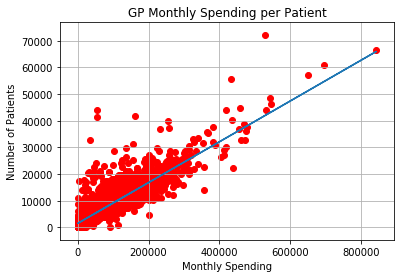

<Figure size 1600x8000 with 0 Axes>

In [876]:
#Method 
#Create the variables
x= GP_PRSC_GB_sc['ACT COST   ']
y= GP_PRSC_GB_sc['NUMBER_OF_PATIENTS']

#fit the trend line
(m, b) = np.polyfit(x, y, 1)
print(m, b)


yp = np.polyval([m, b], x)
plt.plot(x, yp)
plt.grid(True)

#Plot the scatter graph
plt.scatter(x,y, c='red')

#Add to label and title 
plt.xlabel('Monthly Spending')
plt.ylabel('Number of Patients')
plt.title('GP Monthly Spending per Patient')
plt.figure(figsize=(20, 100),  dpi=80)

###### Generate a histogram for relative spending for all practices and fit a Gaussian
(normal) curve

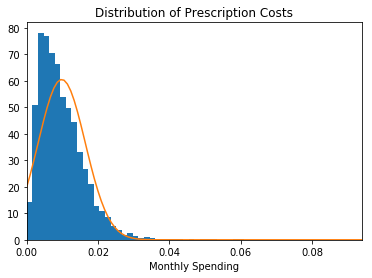

In [1232]:
#Normalise the data using the function below
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

#Input the data 
j = GP_PRSC_GB_sc['ACT COST   ']
x=normalize(j)

#Create the histogram plot 
plt.hist(x, normed=True, bins = 60)
plt.xlim((min(x), max(x)))

#Plot line of best fit
mean = np.mean(x)
variance = np.var(x)
sigma = np.sqrt(variance)
x = np.linspace(min(x), max(x), 100)
plt.plot(x, mlab.normpdf(x, mean, sigma))

#Label 
plt.xlabel('Monthly Spending')
plt.title('Distribution of Prescription Costs')
plt.show()

# Section B

The WHO Mortality Database is a database of registered deaths compiled by WHO from data given by national authorities around the world. The cause of each death is classified by the circumstances that led to death. For this exercise, you will use data which report the cause of death using the 10th revision of the International Classification of Diseases (ICD-10). All of this information is collated into a number of Comma Separated Value (CSV) files, which can be found on the WHO Mortality Database website. The year of interest is 2010.
Each country in the database is uniquely identified all WHO datasets by a four digit numeric code. The mapping between countries and identifier codes is located in the "Country codes" lookup file. Information on the population of each country is found in the "Population and live births" file.

1. What was the population and the total number of deaths (from all causes, all ages) in 2010 for:
o Iceland
o Italy
o New Zealand
2. What was the distribution of deaths (all causes, all years) by age group in Italy? o Visualise the results using a histogram.
3. What were the top five causes of death (top five ICD-10 terms) in Italy across all years for the Neoplasm ICD10-category (C00-D48)?
o Generate a table with the cause of death, the number of deaths, and the proportion of overall deaths.
o Generate a pie chart to visualize the proportion of deaths.
 
4. Are there differences by age group for deaths from Neoplasms (C00-D48) in Australia for 2010?
o Identify the top five age groups in Australia dying with a Neoplasms cause of death.
5. Compare and contrast the frequency of deaths by Neoplasms in Italy and Australia in 2010.
o Combine information on the population and deaths and describe your logic. o Use descriptive statistics and plots.


### Import and explore the data sets for this exercise which are:

In [225]:
#Import the data from the website 
WHO_pop = pd.read_csv("pop.csv", low_memory=False)
WHO_cc = pd.read_csv("country_codes.csv")

WHO_ICD10_1 = pd.read_csv("Morticd10_part1.csv", low_memory=False)
WHO_ICD10_2 =pd.read_csv("Morticd10_part2.csv", low_memory=False)

In [226]:
#Explore the datasets
WHO_pop.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


In [227]:
WHO_pop.tail()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
9378,5195,NaN,NaN,1977,2,4,1358000.0,53400.0,192200.0,NaN,...,28400.0,22000.0,15700.0,15600.0,NaN,NaN,NaN,NaN,0.0,60000.0
9379,5195,NaN,NaN,1980,1,3,1575700.0,53400.0,47400.0,48900.0,...,34100.0,14600.0,7500.0,3300.0,NaN,NaN,NaN,NaN,0.0,65000.0
9380,5195,NaN,NaN,1980,2,3,1435000.0,49300.0,43200.0,44700.0,...,29400.0,12600.0,5800.0,2900.0,NaN,NaN,NaN,NaN,0.0,62000.0
9381,5200,NaN,NaN,2003,1,4,51711.0,1156.0,5045.0,NaN,...,1390.0,1193.0,859.0,952.0,NaN,NaN,NaN,NaN,0.0,1433.0
9382,5200,NaN,NaN,2003,2,4,49693.0,1065.0,4713.0,NaN,...,1406.0,1122.0,854.0,1006.0,NaN,NaN,NaN,NaN,0.0,1348.0


In [228]:
#List the names of the columns of the dataframe
WHO_pop.columns.values

array(['Country', 'Admin1', 'SubDiv', 'Year', 'Sex', 'Frmat', 'Pop1',
       'Pop2', 'Pop3', 'Pop4', 'Pop5', 'Pop6', 'Pop7', 'Pop8', 'Pop9',
       'Pop10', 'Pop11', 'Pop12', 'Pop13', 'Pop14', 'Pop15', 'Pop16',
       'Pop17', 'Pop18', 'Pop19', 'Pop20', 'Pop21', 'Pop22', 'Pop23',
       'Pop24', 'Pop25', 'Pop26', 'Lb'], dtype=object)

In [229]:
WHO_cc.head()

,country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [895]:
WHO_cc.tail()
#The country coulumn of this dataframe matches with country columns of the other dataframes, will merge them using this as a key

,country,name
222,5197,Samoa
223,5198,Solomon Islands
224,5200,Tonga
225,5205,Tuvalu
226,5207,Vanuatu


In [896]:
WHO_ICD10_1.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [232]:
WHO_ICD10_1.tail()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
1388101,4070,NaN,NaN,2004,103,Y85,2,2,1,3,...,0.0,1.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1388102,4070,NaN,NaN,2004,103,Y86,1,2,1,23,...,7.0,2.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1388103,4070,NaN,NaN,2004,103,Y86,2,2,1,16,...,1.0,1.0,11.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1388104,4070,NaN,NaN,2004,103,Y87,1,2,1,4,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1388105,4070,NaN,NaN,2004,103,Y89,1,2,1,2,...,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [233]:
WHO_ICD10_2.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2005,101,1000,1,7,8,386,...,136.0,NaN,NaN,NaN,NaN,0.0,10.0,NaN,NaN,NaN
1,1400,NaN,NaN,2005,101,1000,2,7,8,287,...,163.0,NaN,NaN,NaN,NaN,0.0,6.0,NaN,NaN,NaN
2,1400,NaN,NaN,2005,101,1001,1,7,8,29,...,13.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2005,101,1001,2,7,8,21,...,16.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2005,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [234]:
WHO_ICD10_2.tail()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
2316785,4070,NaN,NaN,2015,103,Y85,1,2,1,14,...,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2316786,4070,NaN,NaN,2015,103,Y85,2,2,1,3,...,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2316787,4070,NaN,NaN,2015,103,Y86,1,2,1,37,...,2.0,5.0,4.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2316788,4070,NaN,NaN,2015,103,Y86,2,2,1,16,...,4.0,1.0,6.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2316789,4070,NaN,NaN,2015,103,Y87,1,2,1,5,...,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [892]:
WHO_ICD10_1.columns.values

array(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Cause', 'Sex',
       'Frmat', 'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4',
       'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10',
       'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15',
       'Deaths16', 'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20',
       'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24', 'Deaths25',
       'Deaths26', 'IM_Deaths1', 'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4'],
      dtype=object)

In [893]:
WHO_ICD10_2.columns.values

array(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Cause', 'Sex',
       'Frmat', 'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4',
       'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10',
       'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15',
       'Deaths16', 'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20',
       'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24', 'Deaths25',
       'Deaths26', 'IM_Deaths1', 'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4'],
      dtype=object)

The columns of the IC10_1 and ICD10_2 are the same so will merge the dataframes together

#### Find out the population and the total number of deaths in 2010 for the countries:

o Iceland

o Italy

o New Zealand

In [237]:
#Part 2
#select the year 2010
WHO_pop2010 = WHO_pop.loc[WHO_pop['Year'].isin(['2010'])]

In [238]:
WHO_pop2010.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
86,1125,NaN,NaN,2010,1,4,40250440.0,1219070.0,3063246.0,NaN,...,971087.0,692772.0,434889.0,407699.0,NaN,NaN,NaN,NaN,0.0,1219070.0
87,1125,NaN,NaN,2010,2,4,38477889.0,1163338.0,2908480.0,NaN,...,871006.0,597495.0,418810.0,391919.0,NaN,NaN,NaN,NaN,0.0,1163338.0
212,1300,NaN,NaN,2010,1,1,612981.0,7265.0,7453.0,7877.0,...,22906.0,14357.0,10138.0,6397.0,4023.0,2088.0,NaN,NaN,0.0,7208.0
213,1300,NaN,NaN,2010,2,1,630103.0,7137.0,7460.0,7779.0,...,26101.0,17808.0,13826.0,9703.0,6886.0,4880.0,NaN,NaN,0.0,7083.0
240,1365,NaN,NaN,2010,1,1,18711.0,372.0,404.0,399.0,...,544.0,482.0,359.0,213.0,97.0,62.0,NaN,NaN,0.0,359.0


Join the databases which have the names of the country with pop2010
- Example merged_left = pd.merge(left=surveySub,right=speciesSub, how='left', left_on='species', right_on='species_id')

In [239]:
#Merge the datasets together to label the countries
WHO_pop2010_name = pd.merge(left=WHO_pop2010, right=WHO_cc, how='left', left_on='Country', right_on='country' )

In [240]:
WHO_pop2010_name

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb,country,name
0,1125,NaN,NaN,2010,1,4,40250440.0,1219070.0,3063246.0,NaN,...,434889.0,407699.0,NaN,NaN,NaN,NaN,0.0,1219070.0,1125,Egypt
1,1125,NaN,NaN,2010,2,4,38477889.0,1163338.0,2908480.0,NaN,...,418810.0,391919.0,NaN,NaN,NaN,NaN,0.0,1163338.0,1125,Egypt
2,1300,NaN,NaN,2010,1,1,612981.0,7265.0,7453.0,7877.0,...,10138.0,6397.0,4023.0,2088.0,NaN,NaN,0.0,7208.0,1300,Mauritius
3,1300,NaN,NaN,2010,2,1,630103.0,7137.0,7460.0,7779.0,...,13826.0,9703.0,6886.0,4880.0,NaN,NaN,0.0,7083.0,1300,Mauritius
4,1365,NaN,NaN,2010,1,1,18711.0,372.0,404.0,399.0,...,359.0,213.0,97.0,62.0,NaN,NaN,0.0,359.0,1365,Rodrigues
5,1365,NaN,NaN,2010,2,1,19129.0,366.0,346.0,395.0,...,455.0,295.0,133.0,137.0,NaN,NaN,0.0,355.0,1365,Rodrigues
6,1400,NaN,NaN,2010,1,3,44253.0,776.0,765.0,653.0,...,778.0,951.0,NaN,NaN,NaN,NaN,0.0,761.0,1400,Seychelles
7,1400,NaN,NaN,2010,2,3,42272.0,713.0,806.0,726.0,...,1186.0,2048.0,NaN,NaN,NaN,NaN,0.0,743.0,1400,Seychelles
8,1430,NaN,NaN,2010,1,3,24731937.0,547183.0,535125.0,525720.0,...,258365.0,239277.0,NaN,NaN,NaN,NaN,0.0,503718.0,1430,South Africa
9,1430,NaN,NaN,2010,2,3,26163763.0,537861.0,526955.0,518610.0,...,454477.0,492055.0,NaN,NaN,NaN,NaN,0.0,494771.0,1430,South Africa


In [241]:
#Select the countries of interest
WHO_pop2010_name_3 =WHO_pop2010_name.loc[WHO_pop2010_name['name'].isin(['Iceland', 'Italy', 'New Zealand'])]

In [242]:
#Find out the population of each country by adding to total population in each group

In [243]:
WHO_pop2010_name_3

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb,country,name
78,4160,NaN,NaN,2010,1,0,159971.0,2529.0,2483.5,2412.0,...,4143.5,3600.0,2577.0,1284.0,401.0,68.0,0.0,2523.0,4160,Iceland
79,4160,NaN,NaN,2010,2,0,158070.0,2409.0,2380.5,2271.0,...,4448.0,4155.0,3374.0,2051.0,798.5,227.5,0.0,2384.0,4160,Iceland
80,4180,NaN,NaN,2010,1,0,29350339.0,287504.0,292981.0,294030.0,...,1400990.0,1078455.0,725761.0,371286.0,90114.0,29700.0,0.0,286701.0,4180,Italy
81,4180,NaN,NaN,2010,2,0,31133047.0,271675.0,278129.0,279329.0,...,1667754.0,1453468.0,1186271.0,788191.0,247726.0,106576.0,0.0,270104.0,4180,Italy
134,5150,NaN,NaN,2010,1,1,2144390.0,32600.0,32650.0,32920.0,...,65470.0,48870.0,34800.0,23940.0,NaN,NaN,0.0,33163.0,5150,New Zealand
135,5150,NaN,NaN,2010,2,1,2222970.0,31160.0,30390.0,31120.0,...,71450.0,56300.0,45900.0,46170.0,NaN,NaN,0.0,31229.0,5150,New Zealand


df.groupby([‘Column_1’, ‘Column_2’], as_index=false).agg(‘sum’)

In [244]:
#Group the columns by their names
WHO_pop20103=WHO_pop2010_name_3.groupby(['name']).agg('sum')
WHO_pop20103['Pop1']

name
Iceland          318041.0
Italy          60483386.0
New Zealand     4367360.0
Name: Pop1, dtype: float64

The population of the different countries were: 

- Iceland          318041.0
- Italy          60483386.0
- New Zealand     4367360.0

### Part 2
- Complete the same methods for deaths by merging: icd10 part 1 and 2

In [891]:
#Select the data for the morality data and merge them
WHO_ICD10 = WHO_ICD10_1.append(WHO_ICD10_2)

In [246]:
#Check to see if merge occured as expected
WHO_ICD10.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [247]:
WHO_ICD10.tail()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
2316785,4070,NaN,NaN,2015,103,Y85,1,2,1,14,...,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2316786,4070,NaN,NaN,2015,103,Y85,2,2,1,3,...,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2316787,4070,NaN,NaN,2015,103,Y86,1,2,1,37,...,2.0,5.0,4.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2316788,4070,NaN,NaN,2015,103,Y86,2,2,1,16,...,4.0,1.0,6.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2316789,4070,NaN,NaN,2015,103,Y87,1,2,1,5,...,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [248]:
#Label the country data
WHO_ICD10_cc = pd.merge(left=WHO_ICD10, right=WHO_cc, how='left', left_on='Country', right_on='country' )

In [249]:
WHO_ICD10_cc.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN,1400,Seychelles
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,1400,Seychelles
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1400,Seychelles
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1400,Seychelles
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1400,Seychelles


In [250]:
#Select the countries of interest using the name match
WHO_ICD10_cc_3 =WHO_ICD10_cc.loc[WHO_ICD10_cc['name'].isin(['Iceland', 'Italy', 'New Zealand'])]

In [251]:
WHO_ICD10_cc3_2010= WHO_ICD10_cc_3.loc[WHO_ICD10_cc_3['Year'].isin(['2010'])]
WHO_ICD10_cc3_2010

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
1536878,4160,NaN,NaN,2010,103,A04,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4160,Iceland
1536879,4160,NaN,NaN,2010,103,A05,2,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4160,Iceland
1536880,4160,NaN,NaN,2010,103,A39,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4160,Iceland
1536881,4160,NaN,NaN,2010,103,A41,1,0,1,5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4160,Iceland
1536882,4160,NaN,NaN,2010,103,A41,2,0,1,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4160,Iceland
1536883,4160,NaN,NaN,2010,103,AAA,1,0,1,1064,...,185.0,113.0,29.0,0.0,3.0,0.0,0.0,2.0,4160,Iceland
1536884,4160,NaN,NaN,2010,103,AAA,2,0,1,955,...,210.0,148.0,73.0,0.0,1.0,1.0,1.0,3.0,4160,Iceland
1536885,4160,NaN,NaN,2010,103,B90,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4160,Iceland
1536886,4160,NaN,NaN,2010,103,B90,2,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4160,Iceland
1536887,4160,NaN,NaN,2010,103,C00,2,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4160,Iceland


In [252]:
#Group by country 
Country_death =WHO_ICD10_cc3_2010.groupby(['name']).agg('sum')
Country_death

,Country,Admin1,Year,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,...,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country
name,,,,,,,,,,,,,,,,,,,,,
Iceland,1410240,0.0,681390,502,0,339,4038,22.0,4.0,4.0,...,734.0,790.0,522.0,204.0,0.0,8.0,2.0,2.0,10.0,1410240
Italy,20774600,0.0,9989700,7323,0,4970,1169230,3726.0,248.0,158.0,...,223034.0,247430.0,127414.0,83786.0,34.0,876.0,998.0,780.0,1072.0,20774600
New Zealand,10675950,0.0,4166730,3065,0,2073,57298,718.0,48.0,46.0,...,9540.0,9840.0,6350.0,2842.0,0.0,260.0,122.0,84.0,252.0,10675950


In [253]:
#Select the death to compare in each country
Country_death['Deaths1']

name
Iceland           4038
Italy          1169230
New Zealand      57298
Name: Deaths1, dtype: int64

The deaths in the population were: 
- Iceland           4038
- Italy          1169230
- New Zealand      57298

### 2. Visualise the proportion of death by age in Italy

In [254]:
#Create the data needed for the histogram
Italy_death = Country_death.iloc[1, 7:-6]
Italy_death

Deaths2       3726.0
Deaths3        248.0
Deaths4        158.0
Deaths5        158.0
Deaths6        122.0
Deaths7        456.0
Deaths8        584.0
Deaths9       1642.0
Deaths10      2330.0
Deaths11      2802.0
Deaths12      4082.0
Deaths13      6272.0
Deaths14     10182.0
Deaths15     15886.0
Deaths16     22282.0
Deaths17     31796.0
Deaths18     51232.0
Deaths19     67594.0
Deaths20    107624.0
Deaths21    158356.0
Deaths22    223034.0
Deaths23    247430.0
Deaths24    127414.0
Deaths25     83786.0
Name: Italy, dtype: float64

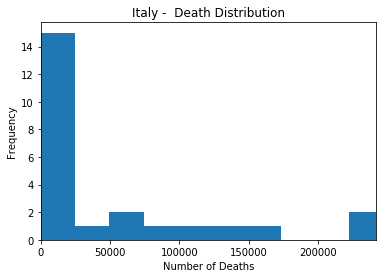

In [850]:
#Plot the distribution of death for all the ages and all the disease categories
#Define the datasource
x= Italy_death
plt.hist(x, bins=10)
#x.hist(bins=7)
plt.xlabel("Number of Deaths")
plt.ylabel('Frequency')


min_x = floor(x.quantile(.01))
max_x = floor(x.quantile(.99))
plt.xlim(min_x, max_x) #do not show outliers
plt.title("Italy -  Death Distribution")
plt.show()

## What were the top five causes of death (top five ICD-10 terms) in Italy across all years for the Neoplasm ICD10-category (C00-D48)?

In [307]:
#Identify the country Italy in the table
WHO_ICD10_Italy10 = WHO_ICD10_cc3_2010[WHO_ICD10_cc3_2010['name'].isin(["Italy"])]

In [308]:
#Check the selection
WHO_ICD10_Italy10.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
3063471,4180,NaN,NaN,2010,104,A010,1,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063472,4180,NaN,NaN,2010,104,A020,1,0,1,3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063473,4180,NaN,NaN,2010,104,A020,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063474,4180,NaN,NaN,2010,104,A021,1,0,1,6,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063475,4180,NaN,NaN,2010,104,A021,2,0,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy


In [914]:
#sort by the cause of death
WHO_ICD10_Italy10_s = WHO_ICD10_Italy10.sort_values(by='Cause', ascending=True)
WHO_ICD10_Italy10_s.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
3063471,4180,NaN,NaN,2010,104,A010,1,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063472,4180,NaN,NaN,2010,104,A020,1,0,1,3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063473,4180,NaN,NaN,2010,104,A020,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063474,4180,NaN,NaN,2010,104,A021,1,0,1,6,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063475,4180,NaN,NaN,2010,104,A021,2,0,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy


In [321]:
#Need to find which column belongs to C00-D48

In [915]:
#Select the ICD10 code for the Neoplasms
Italy = WHO_ICD10_Italy10_s[WHO_ICD10_Italy10_s['Cause'].between('C00', 'D50')]

In [917]:
#Check
Italy.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
3063763,4180,NaN,NaN,2010,104,C000,1,0,1,3,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063764,4180,NaN,NaN,2010,104,C000,2,0,1,4,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063765,4180,NaN,NaN,2010,104,C001,1,0,1,17,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063766,4180,NaN,NaN,2010,104,C001,2,0,1,10,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063767,4180,NaN,NaN,2010,104,C006,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy


In [918]:
Italy.tail()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
3064530,4180,NaN,NaN,2010,104,D486,2,0,1,29,...,3.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3064531,4180,NaN,NaN,2010,104,D487,1,0,1,62,...,6.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3064532,4180,NaN,NaN,2010,104,D487,2,0,1,158,...,36.0,26.0,19.0,0.0,0.0,0.0,1.0,0.0,4180,Italy
3064534,4180,NaN,NaN,2010,104,D489,2,0,1,157,...,37.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3064533,4180,NaN,NaN,2010,104,D489,1,0,1,138,...,26.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,4180,Italy


In [919]:
#Order by the total number of deaths
Italy_dc = Italy.sort_values(by='Deaths1', ascending=False)

In [931]:
#Creat a table for the top 5 neoplasm causes of death
Italy_neo5 =Italy_dc.head()
Italy_neo5

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
3063985,4180,NaN,NaN,2010,104,C349,1,0,1,25224,...,2137.0,428.0,71.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3064101,4180,NaN,NaN,2010,104,C509,2,0,1,12109,...,1529.0,620.0,341.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063986,4180,NaN,NaN,2010,104,C349,2,0,1,8192,...,969.0,322.0,107.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3064124,4180,NaN,NaN,2010,104,C61,1,0,1,7509,...,1706.0,610.0,231.0,1.0,0.0,0.0,0.0,0.0,4180,Italy
3063893,4180,NaN,NaN,2010,104,C189,1,0,1,6273,...,815.0,226.0,66.0,0.0,0.0,0.0,0.0,0.0,4180,Italy


In [937]:
#Slice the columns needed for the table
Italy_neo5.loc[:,['Cause', 'Deaths1']]

,Cause,Deaths1
3063985,C349,25224
3064101,C509,12109
3063986,C349,8192
3064124,C61,7509
3063893,C189,6273


In [941]:
#Calculate the total for the death column
Italy_neo5['Deaths1'].sum()

59307

In [1233]:
#Create a column for the proportion of death
Italy_neo5['prop']= (Italy_neo5['Deaths1']/Italy_neo5['Deaths1'].sum())*100


In [955]:
#Create a table to show the cause of death, number of death and proportion
ITA_Neo5 =Italy_neo5.loc[:,['Cause', 'Deaths1', 'prop']]
ITA_Neo5 

,Cause,Deaths1,prop
3063985,C349,25224,42.531236
3064101,C509,12109,20.417489
3063986,C349,8192,13.812872
3064124,C61,7509,12.661237
3063893,C189,6273,10.577166


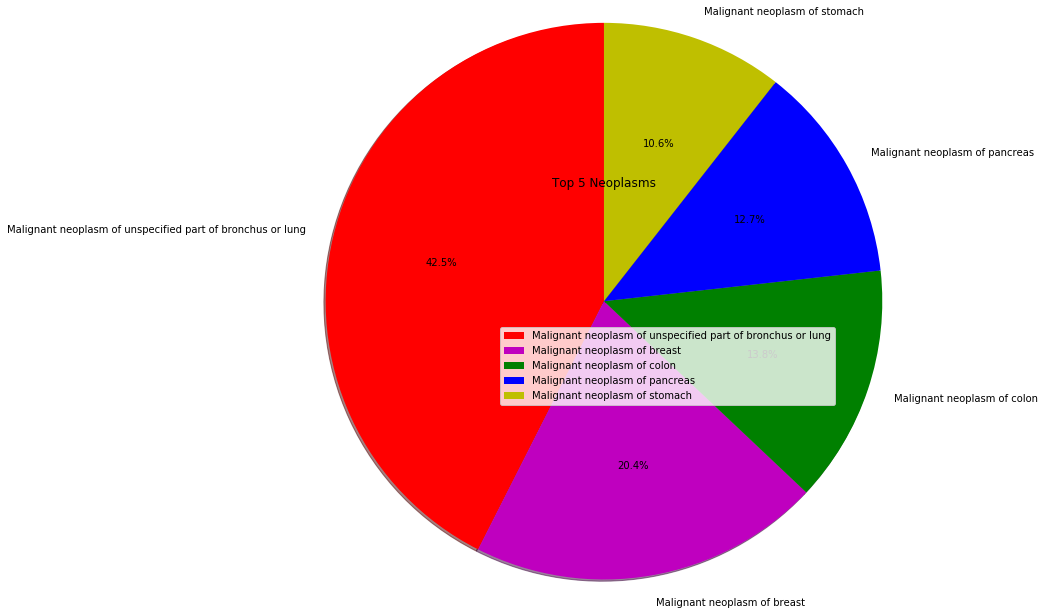

In [1038]:
#Create a pie chart illustating the  
#defining labels
neoplasm = [ 'Malignant neoplasm of unspecified part of bronchus or lung', 'Malignant neoplasm of breast', 
            'Malignant neoplasm of colon','Malignant neoplasm of pancreas','Malignant neoplasm of stomach']
#portion covered by each label
slices = ITA_Neo5['prop']
#color for each label
colors = ['r', 'm', 'g', 'b','y', 'o']
# plotting the pie chart

plt.pie(slices, labels = neoplasm, 
        colors=colors, 
        startangle=90, shadow = True, #explode = (0, 0, 0.1, 0),
        radius = 3.2, autopct = '%1.1f%%')

#Add axis and title
plt.legend(loc='centre')
plt.title("Top 5 Neoplasms", )

plt.show()
plt.close()

The top 5 causes of death for Italy were caused by: 

- C349 - Malignant neoplasm of unspecified part of bronchus or lung
- C509 - Malignant neoplasm of breast of unspecified site 
- C189 - Malignant neoplasm of colon, unspecified
- C259 - Malignant neoplasm of pancreas, unspecified
- C169 - Malignant neoplasm of stomach, unspecified

### 4. Are there differences by age group for deaths from Neoplasms (C00-D48) in Australia for 2010?
o Identify the top five age groups in Australia dying with a Neoplasms cause of death.

In [564]:
#Identify the country Italy in the table
WHO_ICD10_Aus10 = WHO_ICD10_cc.loc[WHO_ICD10_cc['name'].isin(["Australia"])]

In [565]:
#Check to see if the head of the table is what it should be
WHO_ICD10_Aus10.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
1322928,5020,NaN,NaN,1998,104,A021,2,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5020,Australia
1322929,5020,NaN,NaN,1998,104,A047,1,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5020,Australia
1322930,5020,NaN,NaN,1998,104,A047,2,0,1,4,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5020,Australia
1322931,5020,NaN,NaN,1998,104,A048,1,0,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5020,Australia
1322932,5020,NaN,NaN,1998,104,A049,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5020,Australia


In [566]:
#Select causes with the ICD10 for neoplasms
Aus = WHO_ICD10_Aus10[WHO_ICD10_Aus10['Cause'].between('C00', 'D50')]

In [567]:
#Check to see if the datafram is as expected
Aus.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
1323109,5020,NaN,NaN,1998,104,C001,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5020,Australia
1323110,5020,NaN,NaN,1998,104,C001,2,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5020,Australia
1323111,5020,NaN,NaN,1998,104,C005,2,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5020,Australia
1323112,5020,NaN,NaN,1998,104,C009,1,0,1,6,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5020,Australia
1323113,5020,NaN,NaN,1998,104,C009,2,0,1,3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5020,Australia


In [568]:
#Select the yesr of interest which is 2010
Aus10 = Aus[Aus['Year'].isin(['2010'])]

In [569]:
#Select the relevant columns which show the deaths by age group
Aus10_death = Aus10.iloc[:,10:-6]

In [570]:
#Add together the age groups 
Aus_sum =Aus10_death.sum()

In [579]:
#Create a table to show the frequency of death in the different age groups from lowest to highest
pd.DataFrame(Aus_sum.sort_values())

,0
Deaths26,3.0
Deaths3,7.0
Deaths5,7.0
Deaths6,8.0
Deaths2,11.0
Deaths4,11.0
Deaths8,31.0
Deaths7,46.0
Deaths9,50.0
Deaths10,52.0


The top five age groups in Australia dying with a Neoplasms cause of death were for the age groups: 
- Deaths19   - 65-69 years
- Deaths23   - 85-89 years
- Deaths20   - 70-74 years
- Deaths21   - 75-79 years
- Deaths22   - 80-84 years

## 5. Compare and contrast the frequency of deaths by Neoplasms in Italy and Australia in 2010.
o Combine information on the population and deaths and describe your logic. 

o Use descriptive statistics and plots.


In [420]:
#Select the deaths data for Italy and Australia
WHO_ICD10_IA_yrs = WHO_ICD10_cc.loc[WHO_ICD10_cc['name'].isin(["Australia", "Italy"])]

In [421]:
#Select the year 2010
WHO_ICD10_IA =WHO_ICD10_IA_yrs.loc[WHO_ICD10_IA_yrs['Year'].isin(['2010'])]

In [965]:
#Check the data
WHO_ICD10_IA.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
3063471,4180,NaN,NaN,2010,104,A010,1,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063472,4180,NaN,NaN,2010,104,A020,1,0,1,3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063473,4180,NaN,NaN,2010,104,A020,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063474,4180,NaN,NaN,2010,104,A021,1,0,1,6,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063475,4180,NaN,NaN,2010,104,A021,2,0,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy


In [1148]:
#Select diseases with neoplasms
WHO_ICD10_IA_neo = WHO_ICD10_IA[WHO_ICD10_IA['Cause'].between('C00', 'D50')]

In [1149]:
WHO_ICD10_IA_neo.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
3063763,4180,NaN,NaN,2010,104,C000,1,0,1,3,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063764,4180,NaN,NaN,2010,104,C000,2,0,1,4,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063765,4180,NaN,NaN,2010,104,C001,1,0,1,17,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063766,4180,NaN,NaN,2010,104,C001,2,0,1,10,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063767,4180,NaN,NaN,2010,104,C006,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy


In [1150]:
#WHO_ICD10_IA_neo
WHO_ICD10_IA_merger = WHO_ICD10_IA_neo.groupby('name').agg(sum)
WHO_ICD10_IA_merger

,Country,Admin1,Year,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,...,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country
name,,,,,,,,,,,,,,,,,,,,,
Australia,2821240,0.0,1129620,835,0,562,43316,11.0,7.0,11.0,...,7167.0,5520.0,2336.0,735.0,3.0,1.0,2.0,0.0,8.0,2821240
Italy,3226960,0.0,1551720,1162,0,772,175046,19.0,21.0,16.0,...,31509.0,23794.0,7841.0,3023.0,1.0,0.0,0.0,3.0,16.0,3226960


In [1151]:
#Select the Population database with the country names for 2010 from the created in the previous question 
WHO_pop2010_name.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb,country,name
0,1125,NaN,NaN,2010,1,4,40250440.0,1219070.0,3063246.0,NaN,...,434889.0,407699.0,NaN,NaN,NaN,NaN,0.0,1219070.0,1125,Egypt
1,1125,NaN,NaN,2010,2,4,38477889.0,1163338.0,2908480.0,NaN,...,418810.0,391919.0,NaN,NaN,NaN,NaN,0.0,1163338.0,1125,Egypt
2,1300,NaN,NaN,2010,1,1,612981.0,7265.0,7453.0,7877.0,...,10138.0,6397.0,4023.0,2088.0,NaN,NaN,0.0,7208.0,1300,Mauritius
3,1300,NaN,NaN,2010,2,1,630103.0,7137.0,7460.0,7779.0,...,13826.0,9703.0,6886.0,4880.0,NaN,NaN,0.0,7083.0,1300,Mauritius
4,1365,NaN,NaN,2010,1,1,18711.0,372.0,404.0,399.0,...,359.0,213.0,97.0,62.0,NaN,NaN,0.0,359.0,1365,Rodrigues


In [1152]:
#Select Australia and Italy in the population database
WHO_pop2010_IA = WHO_pop2010_name.loc[WHO_pop2010_name['name'].isin(["Australia", "Italy"])]

In [1153]:
WHO_pop2010_IA.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb,country,name
80,4180,NaN,NaN,2010,1,0,29350339.0,287504.0,292981.0,294030.0,...,1400990.0,1078455.0,725761.0,371286.0,90114.0,29700.0,0.0,286701.0,4180,Italy
81,4180,NaN,NaN,2010,2,0,31133047.0,271675.0,278129.0,279329.0,...,1667754.0,1453468.0,1186271.0,788191.0,247726.0,106576.0,0.0,270104.0,4180,Italy
132,5020,NaN,NaN,2010,1,0,11100244.0,148602.0,152751.0,150726.0,...,343395.0,256917.0,188988.0,98056.0,31042.0,7006.0,0.0,152739.0,5020,Australia
133,5020,NaN,NaN,2010,2,0,11197271.0,140766.0,144762.0,143595.0,...,366657.0,296145.0,250921.0,167271.0,68896.0,22168.0,0.0,145164.0,5020,Australia


In [1154]:
#Group by country 
WHO_pop2010_IAg =WHO_pop2010_IA.groupby('name').agg(sum)

In [1155]:
WHO_pop2010_IAg.head()

,Country,Admin1,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,Pop5,...,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb,country
name,,,,,,,,,,,,,,,,,,,,,
Australia,10040,0.0,4020,3,0,22297515.0,289368.0,297513.0,294321.0,286030.0,...,908177.0,710052.0,553062.0,439909.0,265327.0,99938.0,29174.0,0.0,297903.0,10040
Italy,8360,0.0,4020,3,0,60483386.0,559179.0,571110.0,573359.0,571598.0,...,3107714.0,3068744.0,2531923.0,1912032.0,1159477.0,337840.0,136276.0,0.0,556805.0,8360


In [1156]:
#Create a merged dataframe
WHO_pop_death = pd.merge(left=WHO_pop2010_IAg, right=WHO_ICD10_IA_merger, how='left', left_on='name', right_on='name')

In [1157]:
#View the columns
WHO_pop_death.columns

Index(['Country_x', 'Admin1_x', 'Year_x', 'Sex_x', 'Frmat_x', 'Pop1', 'Pop2',
       'Pop3', 'Pop4', 'Pop5', 'Pop6', 'Pop7', 'Pop8', 'Pop9', 'Pop10',
       'Pop11', 'Pop12', 'Pop13', 'Pop14', 'Pop15', 'Pop16', 'Pop17', 'Pop18',
       'Pop19', 'Pop20', 'Pop21', 'Pop22', 'Pop23', 'Pop24', 'Pop25', 'Pop26',
       'Lb', 'country_x', 'Country_y', 'Admin1_y', 'Year_y', 'Sex_y',
       'Frmat_y', 'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4',
       'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10',
       'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16',
       'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22',
       'Deaths23', 'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1',
       'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4', 'country_y'],
      dtype='object')

In [1158]:
#Select the columns needed and remove the one that aren't needed
WHO_pop_death_c =WHO_pop_death.drop(columns=['Country_x', 'country_x', 'Country_y', 'country_y', 'Admin1_y','Admin1_x', 'Year_y', 'Year_x', 'Sex_y', 'Sex_x', 'Frmat_y', 'Frmat_x', 'IM_Frmat'])

In [1159]:
#View the columns
WHO_pop_death_c.columns

Index(['Pop1', 'Pop2', 'Pop3', 'Pop4', 'Pop5', 'Pop6', 'Pop7', 'Pop8', 'Pop9',
       'Pop10', 'Pop11', 'Pop12', 'Pop13', 'Pop14', 'Pop15', 'Pop16', 'Pop17',
       'Pop18', 'Pop19', 'Pop20', 'Pop21', 'Pop22', 'Pop23', 'Pop24', 'Pop25',
       'Pop26', 'Lb', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5',
       'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11',
       'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17',
       'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23',
       'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1', 'IM_Deaths2',
       'IM_Deaths3', 'IM_Deaths4'],
      dtype='object')

In [1160]:
WHO_pop_death_c.head()

,Pop1,Pop2,Pop3,Pop4,Pop5,Pop6,Pop7,Pop8,Pop9,Pop10,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
name,,,,,,,,,,,,,,,,,,,,,
Australia,22297515.0,289368.0,297513.0,294321.0,286030.0,282736.0,1365354.0,1403828.0,1498249.0,1642263.0,...,6291.0,7167.0,5520.0,2336.0,735.0,3.0,1.0,2.0,0.0,8.0
Italy,60483386.0,559179.0,571110.0,573359.0,571598.0,570307.0,2838221.0,2811810.0,2950990.0,3126504.0,...,29884.0,31509.0,23794.0,7841.0,3023.0,1.0,0.0,0.0,3.0,16.0


In [1161]:
WHO_pop_death_c.describe

<bound method NDFrame.describe of                  Pop1      Pop2      Pop3      Pop4      Pop5      Pop6  \
name                                                                      
Australia  22297515.0  289368.0  297513.0  294321.0  286030.0  282736.0   
Italy      60483386.0  559179.0  571110.0  573359.0  571598.0  570307.0   

                Pop7       Pop8       Pop9      Pop10     ...      Deaths21  \
name                                                      ...                 
Australia  1365354.0  1403828.0  1498249.0  1642263.0     ...        6291.0   
Italy      2838221.0  2811810.0  2950990.0  3126504.0     ...       29884.0   

           Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  IM_Deaths1  \
name                                                                      
Australia    7167.0    5520.0    2336.0     735.0       3.0         1.0   
Italy       31509.0   23794.0    7841.0    3023.0       1.0         0.0   

           IM_Deaths2  IM_Deaths3  IM_Deaths4  

In [1162]:
#Select the age groups 
popIA_g = WHO_pop_death_c.loc[:, 'Pop2':'Pop25']

In [1163]:
PopIA_compare = popIA_g.copy(deep='full')

In [1164]:
#Recategorise the 
PopIA_compare['Pop2to6'] = PopIA_compare['Pop2'] + PopIA_compare['Pop3'] + PopIA_compare['Pop4'] + PopIA_compare['Pop5']+ PopIA_compare['Pop6']

In [1165]:
PopIA_comp = PopIA_compare.drop(['Pop2', 'Pop3', 'Pop4','Pop5', 'Pop6'], axis=1)

In [1225]:
cols = PopIA_comp.columns.tolist()
cols = cols[-1:] + cols[:-1]
PopIA_comp[cols]

,Pop2to6,Pop7,Pop8,Pop9,Pop10,Pop11,Pop12,Pop13,Pop14,Pop15,Pop16,Pop17,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25
name,,,,,,,,,,,,,,,,,,,,
Australia,1449968.0,1365354.0,1403828.0,1498249.0,1642263.0,1657438.0,1528993.0,1616023.0,1549610.0,1575858.0,1467896.0,1325205.0,1211191.0,908177.0,710052.0,553062.0,439909.0,265327.0,99938.0,29174.0
Italy,2845553.0,2838221.0,2811810.0,2950990.0,3126504.0,3487901.0,4132871.0,4799943.0,4949158.0,4717717.0,4095185.0,3716030.0,3757507.0,3107714.0,3068744.0,2531923.0,1912032.0,1159477.0,337840.0,136276.0


In [1228]:
PopIA_comp.describe()

,Pop7,Pop8,Pop9,Pop10,Pop11,Pop12,Pop13,Pop14,Pop15,Pop16,Pop17,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop2to6
count,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.000000e+00
mean,2.101788e+06,2.107819e+06,2.224620e+06,2.384384e+06,2.572670e+06,2.830932e+06,3.207983e+06,3.249384e+06,3.146788e+06,2.781540e+06,2.520618e+06,2.484349e+06,2.007946e+06,1.889398e+06,1.542492e+06,1.175970e+06,7.124020e+05,218889.000000,82725.000000,2.147760e+06
std,1.041474e+06,9.955936e+05,1.027243e+06,1.049517e+06,1.294333e+06,1.841220e+06,2.251371e+06,2.403843e+06,2.221630e+06,1.857774e+06,1.690569e+06,1.800517e+06,1.555308e+06,1.667847e+06,1.399266e+06,1.040948e+06,6.322595e+05,168222.117458,75732.550479,9.868276e+05
min,1.365354e+06,1.403828e+06,1.498249e+06,1.642263e+06,1.657438e+06,1.528993e+06,1.616023e+06,1.549610e+06,1.575858e+06,1.467896e+06,1.325205e+06,1.211191e+06,9.081770e+05,7.100520e+05,5.530620e+05,4.399090e+05,2.653270e+05,99938.000000,29174.000000,1.449968e+06
25%,1.733571e+06,1.755824e+06,1.861434e+06,2.013323e+06,2.115054e+06,2.179962e+06,2.412003e+06,2.399497e+06,2.361323e+06,2.124718e+06,1.922911e+06,1.847770e+06,1.458061e+06,1.299725e+06,1.047777e+06,8.079398e+05,4.888645e+05,159413.500000,55949.500000,1.798864e+06
50%,2.101788e+06,2.107819e+06,2.224620e+06,2.384384e+06,2.572670e+06,2.830932e+06,3.207983e+06,3.249384e+06,3.146788e+06,2.781540e+06,2.520618e+06,2.484349e+06,2.007946e+06,1.889398e+06,1.542492e+06,1.175970e+06,7.124020e+05,218889.000000,82725.000000,2.147760e+06
75%,2.470004e+06,2.459814e+06,2.587805e+06,2.755444e+06,3.030285e+06,3.481902e+06,4.003963e+06,4.099271e+06,3.932252e+06,3.438363e+06,3.118324e+06,3.120928e+06,2.557830e+06,2.479071e+06,2.037208e+06,1.544001e+06,9.359395e+05,278364.500000,109500.500000,2.496657e+06
max,2.838221e+06,2.811810e+06,2.950990e+06,3.126504e+06,3.487901e+06,4.132871e+06,4.799943e+06,4.949158e+06,4.717717e+06,4.095185e+06,3.716030e+06,3.757507e+06,3.107714e+06,3.068744e+06,2.531923e+06,1.912032e+06,1.159477e+06,337840.000000,136276.000000,2.845553e+06


In [1167]:
#Plot a line graph to plot age by agegroup category 

In [1168]:
DeathIA_g = WHO_pop_death_c.loc[:, 'Deaths2':'Deaths26']
DeathIA_g['Death2to6']= DeathIA_g['Deaths2']+DeathIA_g['Deaths3']+DeathIA_g['Deaths4']+DeathIA_g['Deaths5']+DeathIA_g['Deaths6']

In [1169]:
DeathIA_g

,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,...,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,Death2to6
name,,,,,,,,,,,,,,,,,,,,,
Australia,11.0,7.0,11.0,7.0,8.0,46.0,31.0,50.0,52.0,97.0,...,3938.0,4768.0,5713.0,6291.0,7167.0,5520.0,2336.0,735.0,3.0,44.0
Italy,19.0,21.0,16.0,26.0,20.0,90.0,97.0,133.0,163.0,234.0,...,14049.0,17890.0,25258.0,29884.0,31509.0,23794.0,7841.0,3023.0,1.0,102.0


In [1170]:
DeathIA_g.drop(['Deaths2','Deaths3','Deaths4','Deaths5','Deaths6'], axis=1)

,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,...,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,Death2to6
name,,,,,,,,,,,,,,,,,,,,,
Australia,46.0,31.0,50.0,52.0,97.0,138.0,323.0,548.0,1065.0,1756.0,...,3938.0,4768.0,5713.0,6291.0,7167.0,5520.0,2336.0,735.0,3.0,44.0
Italy,90.0,97.0,133.0,163.0,234.0,443.0,935.0,1925.0,3437.0,5685.0,...,14049.0,17890.0,25258.0,29884.0,31509.0,23794.0,7841.0,3023.0,1.0,102.0


In [1171]:
cols = DeathIA_g.columns.tolist()
cols = cols[-1:] + cols[:-1]
DeathIA_g[cols]

,Death2to6,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,...,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26
name,,,,,,,,,,,,,,,,,,,,,
Australia,44.0,11.0,7.0,11.0,7.0,8.0,46.0,31.0,50.0,52.0,...,2695.0,3938.0,4768.0,5713.0,6291.0,7167.0,5520.0,2336.0,735.0,3.0
Italy,102.0,19.0,21.0,16.0,26.0,20.0,90.0,97.0,133.0,163.0,...,8553.0,14049.0,17890.0,25258.0,29884.0,31509.0,23794.0,7841.0,3023.0,1.0


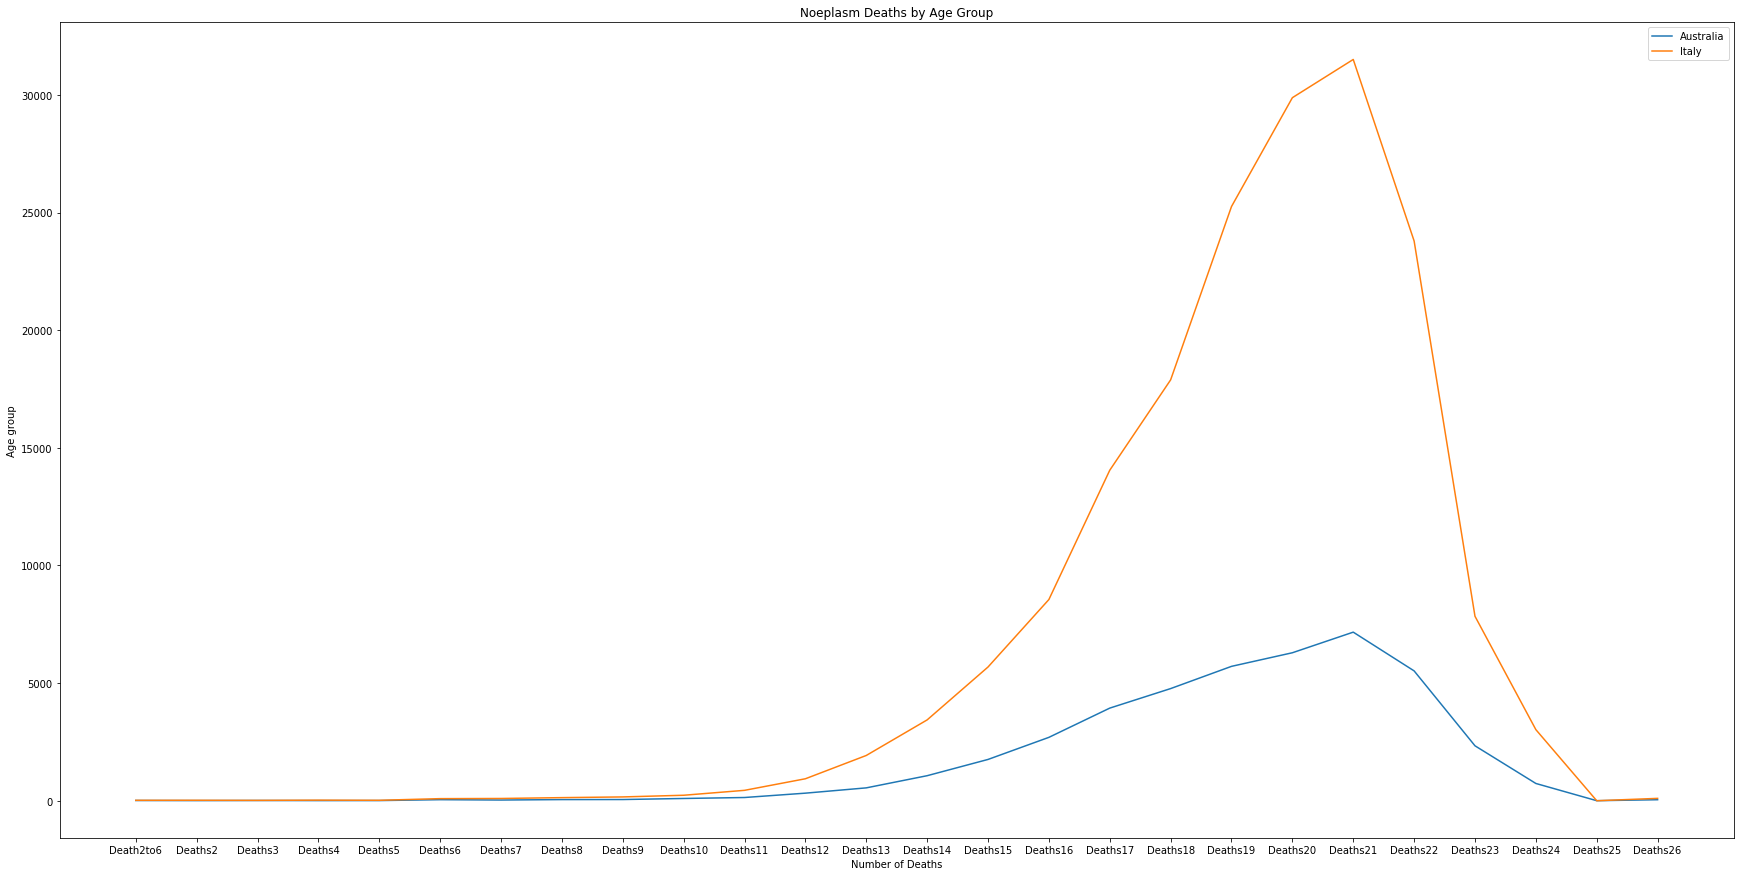

In [1172]:
# First Plot
x1 = DeathIA_g.loc['Australia', :]
x2 = DeathIA_g.loc['Italy',:]
y1 = cols

plt.figure(figsize=(30,15))
# plotting the line 1 points 
plt.plot( y1, x1, label = "Australia")


# 2nd Plot
plt.plot( y1,x2, label = "Italy")

plt.xlabel('Number of Deaths')
plt.ylabel('Age group')

plt.title('Noeplasm Deaths by Age Group')

# Label different lines in a legend
plt.legend()

plt.show()


plt.close()


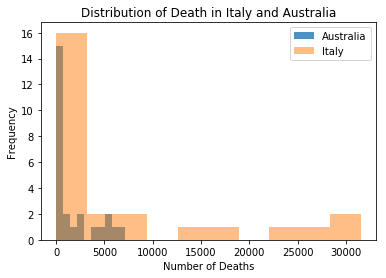

In [1184]:
#Number of death distribution in Italy and 

feature1=np.array(DeathIA_g.loc['Australia',:])
feature2=np.array(DeathIA_g.loc['Italy',:])
plt.hist(feature1, alpha=0.8, label='Australia')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Death in Italy and Australia')
plt.hist(feature2, alpha=0.5, label='Italy')
plt.legend(loc='upper right')
plt.show()

There is greater distribution and higher number of death in Italy compared to Australia. 

In [1223]:
#Select diseases with neoplasms
WHO_ICD10_IA_neo = WHO_ICD10_IA[WHO_ICD10_IA['Cause'].between('C00', 'D50')]

WHO_ICD10_IA_neo.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,country,name
3063763,4180,NaN,NaN,2010,104,C000,1,0,1,3,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063764,4180,NaN,NaN,2010,104,C000,2,0,1,4,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063765,4180,NaN,NaN,2010,104,C001,1,0,1,17,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063766,4180,NaN,NaN,2010,104,C001,2,0,1,10,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy
3063767,4180,NaN,NaN,2010,104,C006,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4180,Italy


In [1197]:
compare_sex = WHO_ICD10_IA_neo.loc[:,['name','Sex','Deaths1','Cause']]
compare_sex.columns

Index(['name', 'Sex', 'Deaths1', 'Cause'], dtype='object')

In [1205]:
compare_sex.groupby(['Sex','name']).agg(sum)
compare_sex.sort_values(by='Deaths1', ascending=False)

,name,Sex,Deaths1,Cause
3063985,Italy,1,25224,C349
3064101,Italy,2,12109,C509
3063986,Italy,2,8192,C349
3064124,Italy,1,7509,C61
3063893,Italy,1,6273,C189
3063863,Italy,1,5426,C169
3063894,Italy,2,5365,C189
3063939,Italy,2,4974,C259
3647630,Australia,1,4859,C349
3063938,Italy,1,4709,C259


The most common cause of death due to a neuoplasm in males in Italy is Malignant neoplasm or unspecified part of bronchus or lung.Whereas most common cause of death in females in Italy is Malignant neoplasm of breast of unspecified site.However the most common cause of death in both males and females in Australia is caused by Malignant neoplasm of unspecified part of bronchus or lung.
